In [124]:
import numpy as np
import matplotlib.pyplot as plt

## A4

In [ ]:
# set params
n = 500
d = 1000
k = 100
sig = 1

# generate data
np.random.seed(0)
X = np.random.normal(0, 1, (n,d))
w = np.arange(1,d+1)/k; w[k:] = 0
y = np.random.normal(X @ w, sig)

# initialize model
wH = np.zeros(len(w)) # w hat
bH = 0 # b hat

# set initial values
lam = max(np.abs(2 * X.T @ (y - y.mean()))) # initial lambda
sparsity = 0 # set initial sparsity

# values to save
lambdas = []
sparsities = []
fdr = []
tpr = []

# pre-calculate values
a = 2*(X**2).sum(axis=0)

# regularization path
while sparsity <= 0.8*k:
    
    dwH = np.ones(len(w)) # set initial dwH
    
    # coordinate descent
    while max(np.abs(dwH)) > 1e-2:

        # update bH
        bH = np.mean(y - X @ wH)

        # calculate c
        c = 2 * X.T @ (y - (bH + X @ wH)) + a * wH

        # update wH
        c[np.where((c >= -lam) & (c <= lam))] = 0
        dwH = (c - np.sign(c)*lam)/a - wH
        wH += dwH
        
    # save values
    lambdas.append(lam)
    sparsity = len(wH[np.abs(wH) > 0])
    sparsities.append(sparsity)
    fdr.append( len(wH[(w == 0) & (wH != 0)]) / np.clip(len(wH[wH!= 0]), 1, None) )
    tpr.append( len(wH[(w != 0) & (wH != 0)]) / k )
    
    print(f'{sparsity:<4}{lam:>7.2f}')
    
    # new lambda
    lam /= 1.5

In [120]:
# set params
n = 500
d = 1000
k = 100
sig = 1

# generate data
np.random.seed(0)
X = np.random.normal(0, 1, (n,d))
w = np.arange(1,d+1)/k; w[k:] = 0
y = np.random.normal(X @ w, sig)

# initialize model
wH = np.zeros(len(w)) # w hat
bH = 0 # b hat

# set initial values
lam = max(np.abs(2 * X.T @ (y - y.mean()))) # initial lambda
sparsity = 0 # set initial sparsity

# values to save
lambdas = []
sparsities = []
fdr = []
tpr = []

# pre-calculate values
a = 2*(X**2).sum(axis=0)

# regularization path
while sparsity <= 0.95*d:
    
    dwH = np.ones(len(w)) # set initial dwH
    
    # coordinate descent
    while max(dwH) > 1e-5:
        
        # save old wH
        wH_old = wH.copy()

        # update bH
        bH = np.mean(y - X @ wH)
        
        for i in range(d):
            
            wH_ = wH.copy(); wH_[i] = 0
            c = 2 * (X[:,i] * (y - (bH + X @ wH_))).sum()
            
            c = c if np.abs(c) > lam else 0
            wH[i] = (c - np.sign(c)*lam)/a[i]
            
        dwH = np.abs(wH - wH_old)
        
    # save values
    lambdas.append(lam)
    sparsity = len(wH[np.abs(wH) > 0])
    sparsities.append(sparsity)
    fdr.append( len(wH[(w == 0) & (wH != 0)]) / np.clip(len(wH[wH!= 0]), 1, None) )
    tpr.append( len(wH[(w != 0) & (wH != 0)]) / k )
    
    print(f'{sparsity:<4}{lam:>7.2f}')
    
    # new lambda
    lam /= 1.5

1   1255.40
16   836.93
43   557.96
70   371.97
93   247.98
125  165.32
159  110.21
198   73.48
248   48.98
317   32.66
360   21.77
401   14.51
424    9.68
458    6.45
473    4.30
486    2.87
496    1.91
501    1.27
505    0.85
514    0.57
518    0.38
538    0.25
551    0.17
557    0.11
574    0.07
591    0.05
624    0.03
648    0.02
673    0.01
705    0.01
741    0.01
777    0.00
812    0.00
850    0.00
892    0.00
916    0.00
938    0.00
950    0.00
957    0.00


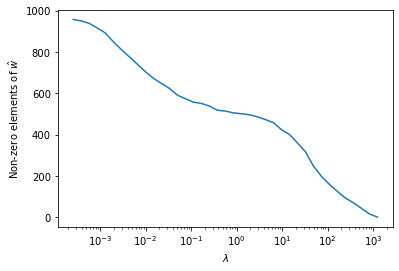

In [123]:
plt.plot(lambdas, sparsities)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Non-zero elements of $\hat{w}$')
plt.savefig('A4a.pdf')

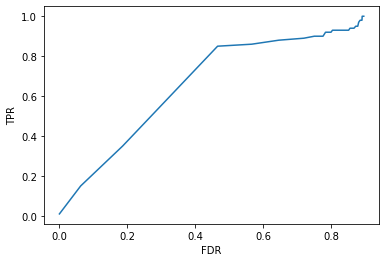

In [124]:
fdr_ = fdr[:3] + fdr[6:]
tpr_ = tpr[:3] + tpr[6:]
plt.plot(fdr_, tpr_)
plt.xlabel('FDR')
plt.ylabel("TPR")
plt.savefig('A4b.pdf')

In [126]:
import numpy as np
import matplotlib.pyplot as plt

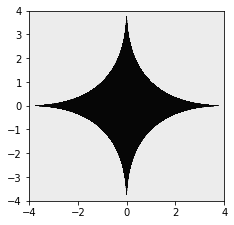

In [127]:
fig = plt.figure(figsize=(3.5,3.5))
x = np.linspace(-4,4,1000)
xv, yv = np.meshgrid(x, x)
zv = (np.sqrt(np.abs(xv)) + np.sqrt(np.abs(yv)))**2
zv[zv <= 4] = 1
zv[zv > 4] = 0

plt.contourf(x,x,zv,cmap='binary',vmin=0,vmax=1)

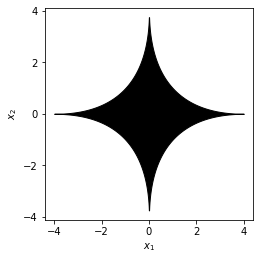

In [128]:
fig, ax = plt.subplots(figsize=(3.5,3.5), 
                       constrained_layout=True)
x = np.linspace(-4,4,1000)
y = (2 - np.sqrt(np.abs(x)))**2
ax.fill_between(x, -y, y, color='k')
ax.set(xlabel='$x_1$', ylabel='$x_2$',
       yticks=[-4,-2,0,2,4])
fig.savefig('B2c.pdf')

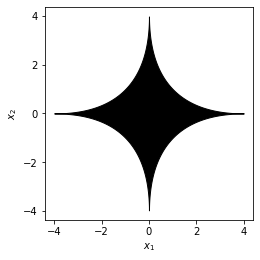

In [224]:
fig, ax = plt.subplots(figsize=(3.5,3.5), 
                       constrained_layout=True)
x = np.linspace(-4,4,100000)
p = 2
y = (4**(1/p) - np.abs(x)**(1/p))**p
ax.fill_between(x, -y, y, color='k')
ax.set(xlabel='$x_1$', ylabel='$x_2$',
       yticks=[-4,-2,0,2,4]);

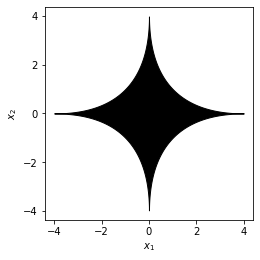

In [234]:
fig, ax = plt.subplots(figsize=(3.5,3.5), 
                       constrained_layout=True)
x = np.linspace(-4,4,100000)
p = 1/2
y = (4**(p) - np.abs(x)**(p))**(1/p)
ax.fill_between(x, -y, y, color='k')
ax.set(xlabel='$x_1$', ylabel='$x_2$',
       yticks=[-4,-2,0,2,4]);

In [25]:
import pandas as pd
df_train = pd.read_table("crime-train.txt")
df_test = pd.read_table("crime-test.txt")

In [26]:
df_train.head()

,ViolentCrimesPerPop,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
0,0.67,-0.45,-1.85,-1.06,0.67,0.08,-0.85,-0.34,0.68,-0.24,...,-0.23,-0.02,-0.53,-1.08,-0.13,-0.66,-0.41,-0.56,1.26,-0.39
1,0.43,-0.45,-0.27,-0.22,-0.17,-0.34,-0.58,-0.50,-1.57,-0.29,...,-0.23,-0.33,-0.58,0.03,0.22,-0.46,-0.50,-0.11,-0.62,-0.39
2,0.12,-0.14,1.87,0.55,0.04,0.02,-1.19,-0.03,0.68,1.05,...,-0.23,-0.11,-1.51,1.07,0.07,-0.01,-0.41,0.77,0.52,-0.39
3,0.03,-0.38,0.53,-0.28,-0.79,-0.64,-0.35,-0.34,0.46,0.66,...,-0.23,-0.46,0.54,0.58,-0.08,-0.61,-0.23,-0.70,-0.62,-0.39
4,0.14,-0.30,-1.12,-0.74,-0.10,-0.40,-0.30,-0.19,0.68,0.76,...,-0.23,2.10,-0.92,-0.25,0.52,-0.06,-0.50,1.71,-0.27,-0.39


In [28]:
df_train.shape

(1595, 96)

In [165]:
X = df_train.drop('ViolentCrimesPerPop', axis = 1).values
y = df_train['ViolentCrimesPerPop'].values

Xtest = df_test.drop('ViolentCrimesPerPop', axis = 1).values
ytest = df_test['ViolentCrimesPerPop'].values

d = X.shape[1]

# initialize model
wH = np.zeros(d) # w hat
bH = 0 # b hat

# set initial values
lam = max(np.abs(2 * X.T @ (y - y.mean()))) # initial lambda
sparsity = 0 # set initial sparsity

# values to save
lambdas = []
sparsities = []
variables = ['agePct12t29',
             'pctWSocSec',
             'pctUrban',
             'agePct65up',
             'householdsize']
regpaths = {var:[] for var in variables}
trainerr = []
testerr = []

# pre-calculate values
a = 2*(X**2).sum(axis=0)

# regularization path
while lam >= 0.01:
    
    dwH = np.ones(len(w)) # set initial dwH
    
    # coordinate descent
    while max(dwH) > 1e-5:
        
        # save old wH
        wH_old = wH.copy()

        # update bH
        bH = np.mean(y - X @ wH)
        
        for i in range(d):
            
            wH_ = wH.copy(); wH_[i] = 0
            c = 2 * (X[:,i] * (y - (bH + X @ wH_))).sum()
            
            c = c if np.abs(c) > lam else 0
            wH[i] = (c - np.sign(c)*lam)/a[i]
            
        dwH = np.abs(wH - wH_old)
        
    # save values
    lambdas.append(lam)
    sparsity = len(wH[np.abs(wH) > 0])
    sparsities.append(sparsity)
    for var in variables:
        idx = df_train.columns.get_loc(var)
        regpaths[var].append(wH[idx])
    trainerr.append(((y - bH - X @ wH)**2).mean())
    testerr.append(((ytest - bH - Xtest @ wH)**2).mean())
    
    print(f'{sparsity:<4}{lam:>7.2f}')
    
    # new lambda
    lam /= 2

0    541.48
2    270.74
4    135.37
7     67.69
12    33.84
19    16.92
27     8.46
45     4.23
63     2.12
74     1.06
81     0.53
89     0.26
90     0.13
93     0.07
95     0.03
95     0.02


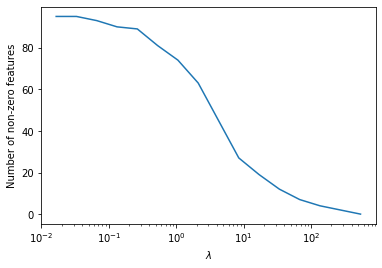

In [167]:
plt.plot(lambdas, sparsities)
plt.xscale('log')
plt.xlabel("$\lambda$")
plt.ylabel("Number of non-zero features")
plt.savefig('A5a.pdf')

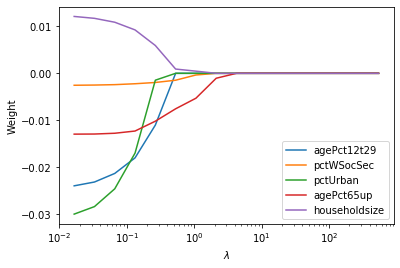

In [169]:
for var in variables:
    plt.plot(lambdas, regpaths[var], label=var)
    
plt.legend()
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Weight')
plt.savefig('A5b.pdf')

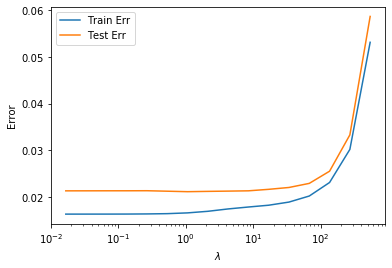

In [170]:
plt.plot(lambdas, trainerr, label="Train Err")
plt.plot(lambdas, testerr, label="Test Err")
plt.legend()
plt.xscale('log')
plt.xlabel("$\lambda$")
plt.ylabel("Error")
plt.savefig("A5c.pdf")

In [163]:
X = df_train.drop('ViolentCrimesPerPop', axis = 1).values
y = df_train['ViolentCrimesPerPop'].values

Xtest = df_test.drop('ViolentCrimesPerPop', axis = 1).values
ytest = df_test['ViolentCrimesPerPop'].values

d = X.shape[1]

# initialize model
wH = np.zeros(d) # w hat
bH = 0 # b hat

# set initial values
lam = 30 # lambda
sparsity = 0 # set initial sparsity

# pre-calculate values
a = 2*(X**2).sum(axis=0)

    
dwH = np.ones(len(w)) # set initial dwH

# coordinate descent
while max(dwH) > 1e-5:

    # save old wH
    wH_old = wH.copy()

    # update bH
    bH = np.mean(y - X @ wH)

    for i in range(d):

        wH_ = wH.copy(); wH_[i] = 0
        c = 2 * (X[:,i] * (y - (bH + X @ wH_))).sum()

        c = c if np.abs(c) > lam else 0
        wH[i] = (c - np.sign(c)*lam)/a[i]

    dwH = np.abs(wH - wH_old)

print(f'most positive -- {df_train.columns[np.argmax(wH)]}')
print(f'most negative -- {df_train.columns[np.argmax(-wH)]}')

most positive -- NumIlleg
most negative -- PctFam2Par


# A.6

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [86]:
from mnist import MNIST

def load_dataset():
    mndata = MNIST('../../../python-mnist/data/')
    X_train, labels_train = map(np.array, mndata.load_training())
    X_test, labels_test = map(np.array, mndata.load_testing())
    X_train = X_train/255.0
    X_test = X_test/255.0
    
    return X_train, labels_train, X_test, labels_test

X_train, Y_train, X_test, Y_test = load_dataset()

In [87]:
# keep only 2's and 7's
X_train = X_train[(Y_train == 2) | (Y_train == 7)]
Y_train = Y_train[(Y_train == 2) | (Y_train == 7)].astype(np.int16)
X_test = X_test[(Y_test == 2) | (Y_test == 7)]
Y_test = Y_test[(Y_test == 2) | (Y_test == 7)].astype(np.int16)

# set 7 -> 1, 2 -> -1
Y_train[Y_train == 7] = 1
Y_train[Y_train == 2] = -1
Y_test[Y_test == 7] = 1
Y_test[Y_test == 2] = -1

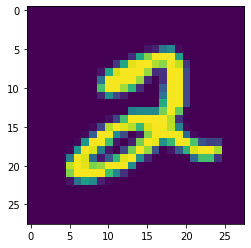

In [91]:
plt.imshow(X_train[0].reshape(28,28))

In [154]:
# NEED TO CHANGE THE LOSS FUNCTION TO SOMETHING ELSE!

class MNIST_Classifier():
    
    def __init__(self):
        self.w = None
        self.b = None
        self.lam = None
        
    def predict(self, X):
        return np.sign(X @ self.w + self.b)
        
    def train(self, X, y, Xtest, ytest, lam=1e-1, step=0.1):
        
        n, d = X.shape
        
        self.w = np.zeros(d)
        self.b = 0
        self.lam = lam
        
        J_train = [self.J(X, y)]
        J_test = [self.J(Xtest, ytest)]
        err_train = [self.err(X, y)]
        err_test = [self.err(Xtest, ytest)]
        
        for i in range(40):
            
            self.w -= step * self.grad_w(X, y)
            self.b -= step * self.grad_b(X, y)
            
            J_train.append(self.J(X, y))
            J_test.append(self.J(Xtest, ytest))
            err_train.append(self.err(X, y))
            err_test.append(self.err(Xtest, ytest))
            
        return J_train, J_test, err_train, err_test
        
    def mu(self, X, y):
        return 1/(1 + np.exp(- y * (X @ self.w + self.b)))
    
    def grad_w(self, X, y):
        return (y * X.T * (self.mu(X, y) - 1)).mean(axis=1) + 2 * self.lam * self.w
    
    def grad_b(self, X, y):
        return (y * (self.mu(X, y) - 1)).mean()
    
    def J(self, X, y):
        return np.log(1 + np.exp(- y * (X @ self.w + self.b))).mean() + self.lam * (self.w * self.w).sum()
    
    def err(self, X, y):
        yhat = self.predict(X)
        class_err = len(yhat[yhat != y])/len(yhat)
        return class_err

In [216]:
# NEED TO CHANGE THE LOSS FUNCTION TO SOMETHING ELSE!

class MNIST_Classifier():
    
    def __init__(self):
        self.w = None
        self.b = None
        self.lam = None
        
    def predict(self, X):
        return np.sign(X @ self.w + self.b)
        
    def train(self, X, y, Xtest, ytest, lam=1e-1, step_size=0.1, steps=40, batch_size=None, seed=0):
        
        np.random.seed(seed) # random seed for SGD
        
        # initialize values
        self.w = np.zeros(X.shape[1])
        self.b = 0
        self.lam = lam
        
        # values I want to save per step
        J_train = [self.J(X, y)]
        J_test = [self.J(Xtest, ytest)]
        err_train = [self.err(X, y)]
        err_test = [self.err(Xtest, ytest)]
        
        for i in range(steps):
            
            # if batch_size, select a random batch, else select all values
            idx = np.random.choice(len(y), batch_size, replace=False) if batch_size else np.arange(len(y))
            X_ = X[idx]
            y_ = y[idx]
            
            # apply gradients
            self.w -= step_size * self.grad_w(X_, y_)
            self.b -= step_size * self.grad_b(X_, y_)
            
            # save values
            J_train.append(self.J(X, y))
            J_test.append(self.J(Xtest, ytest))
            err_train.append(self.err(X, y))
            err_test.append(self.err(Xtest, ytest))
            
        return J_train, J_test, err_train, err_test
        
    def mu(self, X, y):
        return 1/(1 + np.exp(- y * (X @ self.w + self.b)))
    
    def grad_w(self, X, y):
        return (y * X.T * (self.mu(X, y) - 1)).mean(axis=1) + 2 * self.lam * self.w
    
    def grad_b(self, X, y):
        return (y * (self.mu(X, y) - 1)).mean()
    
    def J(self, X, y):
        return np.log(1 + np.exp(- y * (X @ self.w + self.b))).mean() + self.lam * (self.w * self.w).sum()
    
    def err(self, X, y):
        yhat = self.predict(X)
        class_err = len(yhat[yhat != y])/len(yhat)
        return class_err

In [217]:
model = MNIST_Classifier()
J_train, J_test, err_train, err_test = model.train(X_train, Y_train, X_test, Y_test, batch_size=1, steps=100)

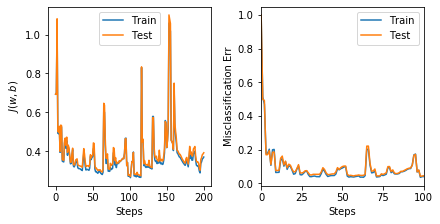

In [221]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(6,3), constrained_layout=True)

ax1.plot(np.arange(len(J_train)), J_train, label='Train')
ax1.plot(np.arange(len(J_test)),  J_test,  label='Test')
ax1.legend()
ax1.set(xlabel='Steps', ylabel='$J(w,b)$')

ax2.plot(np.arange(len(err_train)), err_train, label='Train')
ax2.plot(np.arange(len(err_test)),  err_test,  label='Test')
ax2.legend()
ax2.set(xlabel='Steps', ylabel='Misclassification Err',
        xlim=(-0.3,100))

fig.savefig('A6c.pdf')

# B.4

In [138]:
import torch
from mnist import MNIST

def load_dataset():
    mndata = MNIST('../../../python-mnist/data/')
    X_train, labels_train = map(np.array, mndata.load_training())
    X_test, labels_test = map(np.array, mndata.load_testing())
    X_train = X_train/255.0
    X_test = X_test/255.0
    
    return X_train, labels_train, X_test, labels_test

X_train, Y_train, X_test, Y_test = load_dataset()

In [139]:
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(Y_train).long()
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(Y_test).long()

In [140]:
epochs = 1000
step_size = 0.1
W = torch.zeros(784, 10, requires_grad=True)
ce_loss = []
for epoch in range(epochs):
    y_hat = torch.matmul(X_train, W)
    # cross entropy combines softmax calculation with NLLLoss
    loss = torch.nn.functional.cross_entropy(y_hat, y_train)
    ce_loss.append(loss)
    # computes derivatives of the loss with respect to W
    loss.backward()
    # gradient descent update
    W.data = W.data - step_size * W.grad
    # .backward() accumulates gradients into W.grad instead
    # of overwriting, so we need to zero out the weights
    W.grad.zero_()

In [141]:
y_hat = torch.matmul(X_train, W).argmax(axis=1)
softmax_acc_train = len(y_train[(y_hat == y_train)])/len(y_train)

y_hat = torch.matmul(X_test, W).argmax(axis=1)
softmax_acc_test = len(y_test[(y_hat == y_test)])/len(y_test)

In [142]:
print(f'softmax train acc -- {softmax_acc_train:.3f}')
print(f'softmax test acc -- {softmax_acc_test:.3f}')

softmax train acc -- 0.903
softmax test acc -- 0.908


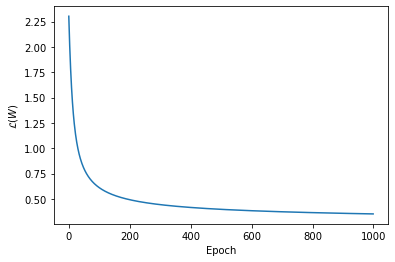

In [143]:
plt.plot(ce_loss)
plt.xlabel('Epoch')
plt.ylabel('$\mathcal{L}(W)$')
plt.savefig('B4_celoss.pdf')

In [144]:
W = torch.zeros(784, 10, requires_grad=True)
mse_loss = []
step_size = 0.1
epochs = 1000
for epoch in range(epochs):
    y_hat = torch.matmul(X_train, W)
    # this time use MSE loss
    loss = torch.nn.functional.mse_loss(y_hat, torch.nn.functional.one_hot(y_train).float())
    mse_loss.append(loss)
    # computes derivatives of the loss with respect to W
    loss.backward()
    # gradient descent update
    W.data = W.data - step_size * W.grad
    # .backward() accumulates gradients into W.grad instead
    # of overwriting, so we need to zero out the weights
    W.grad.zero_()

In [145]:
y_hat = torch.matmul(X_train, W).argmax(axis=1)
mse_acc_train = len(y_train[(y_hat == y_train)])/len(y_train)

y_hat = torch.matmul(X_test, W).argmax(axis=1)
mse_acc_test = len(y_test[(y_hat == y_test)])/len(y_test)

In [146]:
print(f'mse train acc -- {mse_acc_train:.3f}')
print(f'mse test acc -- {mse_acc_test:.3f}')

mse train acc -- 0.851
mse test acc -- 0.856


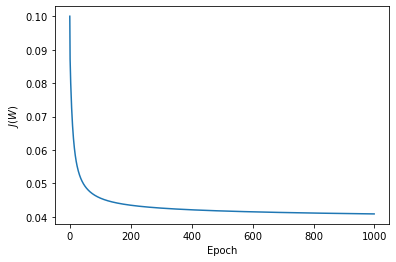

In [147]:
plt.plot(mse_loss)
plt.xlabel('Epoch')
plt.ylabel('$J(W)$')
plt.savefig('B4_mseloss.pdf')

## B5.c

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 4
d = 2

X = []
for i in range(0,n):
    j = i % d
    x = np.zeros(d)
    x[j] = np.sqrt(j + 2)
    X.append(x)
X = np.array(X)

In [3]:
X

array([[1.41421356, 0.        ],
       [0.        , 1.73205081],
       [1.41421356, 0.        ],
       [0.        , 1.73205081]])

In [6]:
X.T @ X

array([[4., 0.],
       [0., 6.]])

In [9]:
np.array([[1/4,0],[0,1/6]]) @ X.T

array([[0.35355339, 0.        , 0.35355339, 0.        ],
       [0.        , 0.28867513, 0.        , 0.28867513]])

In [275]:
np.diag([(j+1)*n/d for j in range(1,d+1)])

array([[ 4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 14.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 16.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., 18.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 20.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 22.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 24.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 26.]])

In [271]:
a = np.array([(j+1)*(n//d) for j in range(1,d+1)])
b = np.array([(j+1) for j in range(1,d+1)])
b[n%d:] = 0
np.diag(a+b)

array([[14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 24,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 42,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 48,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 60,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 66,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 72,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 78]])

In [119]:
np.random.seed(0)
Y = np.random.normal(0, 1, n)

In [46]:
beta = np.diag(0.5/np.arange(1,d+1)) @ X.T @ Y

In [64]:
lim = np.sqrt(1/np.arange(1,d+1)*np.log(2/0.95))
nabove = len(beta[np.abs(beta) > lim])
print(nabove/d)

0.2


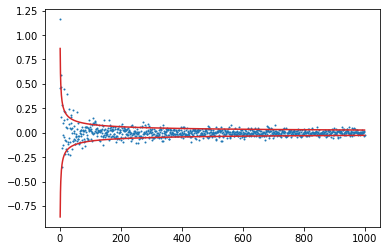

In [65]:
plt.scatter(np.arange(1, d+1), beta, s=1)
plt.plot(np.arange(1, d+1),  lim, c='C3')
plt.plot(np.arange(1, d+1), -lim, c='C3')

In [2]:
n = 20000
d = 10000

X = []
for i in range(0,n):
    j = i % d
    x = np.zeros(d)
    x[j] = np.sqrt(j + 2)
    X.append(x)
X = np.array(X)

np.random.seed(0)
Y = np.random.normal(0, 1, n)

XTY = X.T @ Y

beta = d/(n*(1 + np.arange(1,d+1))) * XTY
gamma = np.sqrt(2 * d/(n*(1 + np.arange(1,d+1))) * np.log(2/0.95))

nabove = len(beta[np.abs(beta) > gamma])
print(nabove/d)

In [3]:
beta = d/(n*(1 + np.arange(1,d+1))) * XTY
gamma = np.sqrt(2 * d/(n*(1 + np.arange(1,d+1))) * np.log(2/0.95))

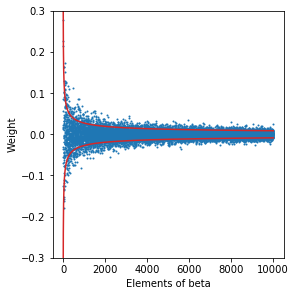

In [13]:
fig,ax = plt.subplots(figsize=(4,4), constrained_layout=True)

ax.scatter(np.arange(1,d+1), beta, s=1)
ax.plot(np.arange(1,d+1), -gamma, c='C3')
ax.plot(np.arange(1,d+1),  gamma, c='C3')
ax.set(ylim=(-0.3,0.3),
       xlabel='Elements of beta',
       ylabel='Weight')
fig.savefig('B5d.pdf')

In [12]:
nabove = len(beta[np.abs(beta) > gamma])
print(nabove/d)

0.2153


In [36]:
Y.shape

(2000,)

In [13]:
XTY

array([   2.20891011,   -0.75010581,    5.42467646, ...,   45.9589945 ,
       -109.18519547,   97.16315676])